## Imports

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
from wordcloud import WordCloud
import matplotlib.pyplot as plt



## load the results from each experiment in a dataframe

In [2]:
# Load the models' results in dataframes
# CNN Results
dfCNN = pd.read_csv('../Results/CNN_Results.csv',sep=',')

# LSTM Results
dfLSTM = pd.read_csv('../Results/LSTM_Results.csv',sep=',')

# GRU Results
dfGRU = pd.read_csv('../Results/GRU_Results.csv',sep=',')

In [3]:
dfLSTM.head(2)

,Text,Actual Label,Predicted Label,Word and Weight,Keywords,reconstructed_sentences
0,after two good new years this one is the worst after finally going through new year with friends last two years this year they finally betrayed and excluded me from their group by spreading false rumors about me now i'm alone at home while i watch their comments and pictures about what they're doing god i've never felt so empty and hurting my chest hurts so much it's almost umbearable and i never thought about killing myself that much,moderate,moderate,"myself (0.021386943757534027), going (0.015996096655726433), good (0.011004204861819744), thought (0.010442528873682022), finally (0.010082751512527466), year (0.00865843053907156), new (0.007961198687553406), is (0.007695648819208145), they're (0.007142906542867422), after (0.0062502166256308556), and (0.006157490890473127), home (0.005841008387506008), so (0.005835400894284248), years (0.005399281159043312), new (0.005336816888302565), and (0.005296692252159119), me (0.004799222107976675), friends (0.004766278434544802), pictures (0.004496197681874037), at (0.004119303543120623), rumors (0.004089337773621082), doing (0.0032341706100851297), two (0.003198420163244009), through (0.0029605007730424404), much (0.002734146546572447), two (0.0026000889483839273), empty (0.0022738261613994837), i've (0.002264368813484907), so (0.00220676907338202), while (0.002077376237139106), god (0.00206481060013175), and (0.0019774404354393482), their (0.0019258403917774558), umbearable (0.001195499673485756), this (0.0010079917265102267), i (0.0006894813268445432), never (0.0006606640527024865), much (0.0005399619112722576), i (0.0005100597627460957), false (0.0001982373505597934), group (7.354030822170898e-05), it's (6.688392022624612e-05), after (4.510295548243448e-05), chest (-0.0003006188489962369), finally (-0.0004365361528471112), now (-0.0009685838012956083), my (-0.0010308041237294674), the (-0.001139086321927607), comments (-0.0012621855130419135), their (-0.0014047921868041158), last (-0.0015457505360245705), excluded (-0.0016819438897073269), they (-0.0024025901220738888), watch (-0.002458582166582346), and (-0.00276823528110981), almost (-0.002768808277323842), hurting (-0.002782105002552271), one (-0.0029973008204251528), hurts (-0.0030992841348052025), i'm (-0.003665799740701914), with (-0.0038184153381735086), from (-0.004094722680747509), about (-0.004382193088531494), worst (-0.004419043660163879), about (-0.004560733679682016), years (-0.005094914697110653), about (-0.00524899223819375), by (-0.005593100097030401), felt (-0.005830008070915937), spreading (-0.006419844925403595), alone (-0.00656620180234313), that (-0.006695919670164585), betrayed (-0.006699252407997847), this (-0.006920142099261284), me (-0.008303136564791203), year (-0.008869667537510395), what (-0.009820554405450821), never (-0.010505270212888718), killing (-0.03540577366948128)","good new years (0.5442684159510587), year (0.408201311963294), false (0.009602592248474224), finally (0.007823817228888853)","hurting my chest hurts so much it's almost umbearable and i never thought about killing myself that much, after two good new years this one is the worst after finally going through new year with friends last two years this year they finally betrayed and excluded, after two good new years this one is the worst after finally going through new year with friends, so empty and hurting my chest hurts so much it's almost umbearable and i never thought about killing myself that much,"
1,suggesting therapy to girlfriend removed,not depression,not depression,"to (0.012233338318765163), girlfriend (0.008107450790703297), therapy (0.002093525370582938), suggesting (0.0002411155728623271), removed (-0.00536118820309639)",suggesting therapy (0.7069495900660399),", suggesting therapy to girlfriend removed, suggesting therapy to girlfriend removed, ,"


In [4]:
dfGRU.head(2)

,Text,Actual Label,Predicted Label,Word and Weight,Keywords,reconstructed_sentences
0,after two good new years this one is the worst after finally going through new year with friends last two years this year they finally betrayed and excluded me from their group by spreading false rumors about me now i'm alone at home while i watch their comments and pictures about what they're doing god i've never felt so empty and hurting my chest hurts so much it's almost umbearable and i never thought about killing myself that much,moderate,moderate,"from (0.05283566936850548), about (0.03975547105073929), thought (0.02016114629805088), felt (0.019009748473763466), and (0.017427004873752594), and (0.016996284946799278), never (0.016514120623469353), chest (0.015348447486758232), after (0.014875177294015884), the (0.013738124631345272), year (0.013131111860275269), worst (0.012046451680362225), empty (0.012036187574267387), i've (0.011291255243122578), new (0.011198291555047035), by (0.011157619766891003), about (0.010548336431384087), home (0.010493637062609196), so (0.00953754037618637), much (0.009363696910440922), after (0.00929046981036663), good (0.008448869921267033), now (0.008438775315880775), spreading (0.0071549611166119576), and (0.007150530815124512), last (0.006829786114394665), finally (0.006753271445631981), is (0.006698853801935911), with (0.006682710722088814), me (0.006323534529656172), going (0.0054611763916909695), my (0.005421116016805172), years (0.005280287470668554), me (0.004519374575465918), while (0.004180497955530882), i (0.004172436892986298), hurts (0.003827624022960663), much (0.003642000025138259), new (0.0019577164202928543), excluded (0.000880939420312643), pictures (-6.004090391797945e-05), two (-0.00029882657690905035), myself (-0.00044547824654728174), watch (-0.000553634949028492), alone (-0.0007160839159041643), i (-0.0019517932087182999), about (-0.0020424777176231146), their (-0.0033053122460842133), year (-0.0034480339381843805), rumors (-0.0037647339049726725), friends (-0.004230635240674019), hurting (-0.005232621915638447), doing (-0.005412153899669647), what (-0.00543101504445076), they (-0.005607582628726959), almost (-0.006133809685707092), their (-0.0071422322653234005), years (-0.00755748525261879), god (-0.00814573559910059), that (-0.00828110333532095), at (-0.008594422601163387), one (-0.009382320567965508), comments (-0.009485729038715363), finally (-0.009769517928361893), i'm (-0.0102864820510149), this (-0.01114740688353777), group (-0.011336387135088444), they're (-0.012166740372776985), this (-0.012201357632875443), betrayed (-0.014221432618796825), it's (-0.01486588642001152), false (-0.0151060800999403), through (-0.015192014165222645), umbearable (-0.015550374053418636), and (-0.017352009192109108), killing (-0.02037232369184494), two (-0.027395037934184074), so (-0.028287170454859734), never (-0.02948889508843422)","good new years (0.5442684159510587), year (0.408201311963294), false (0.009602592248474224), finally (0.007823817228888853)","new year with friends last two years this year they finally betrayed and excluded me from their group by spreading false rumors about me now i'm alone at home while i, this year they finally betrayed and excluded me from their group by spreading false rumors about me now i'm alone at home while i watch their comments and pictures about what, , so empty and hurting my chest hurts so much it's almost umbearable and i never thought about killing myself that much, home while i watch their comments and pictures about what they're doing god i've never felt so empty and hurting my chest hurts so much it's almost umbearable and i never"
1,suggesting therapy to girlfriend removed,not depression,not depression,"suggesting (0.014785433188080788), girlfriend (0.013651084154844284), to (0.008762013167142868), removed (0.0037838532589375973), therapy (-0.0004885055823251605)",suggesting therapy (0.7069495900660399),", , , ,"


In [5]:
dfCNN.head(2)

,Text,Actual Label,Predicted Label,Word and Weight,Keywords,reconstructed_sentences
0,after two good new years this one is the worst after finally going through new year with friends last two years this year they finally betrayed and excluded me from their group by spreading false rumors about me now i'm alone at home while i watch their comments and pictures about what they're doing god i've never felt so empty and hurting my chest hurts so much it's almost umbearable and i never thought about killing myself that much,moderate,moderate,"from (0.06603236496448517), after (0.006930427625775337), new (0.005692554172128439), last (0.005362906027585268), two (0.005251917988061905), years (0.005189448595046997), excluded (0.004470644984394312), betrayed (0.004309038165956736), friends (0.004297279752790928), two (0.004066605120897293), they (0.003965338692069054), year (0.0037137684412300587), new (0.003712217090651393), going (0.003630929859355092), and (0.0035917642526328564), is (0.0034002522006630898), good (0.0033281210344284773), with (0.0031796800903975964), me (0.0031523718498647213), finally (0.0030904540326446295), years (0.0030810008756816387), this (0.003045728662982583), group (0.002854512073099613), through (0.0027667866088449955), this (0.0027273499872535467), finally (0.002587615977972746), their (0.0023161291610449553), the (0.002208998892456293), after (0.002158221323043108), year (0.0020373156294226646), one (0.0018815126968547702), worst (0.0016391366953030229)","good new years (0.5442684159510587), year (0.408201311963294), false (0.009602592248474224), finally (0.007823817228888853)","new year with friends last two years this year they finally betrayed and excluded me from their group by spreading false rumors about me now i'm alone at home while i, after two good new years this one is the worst after finally going through new year with friends last two years this year they finally betrayed, after two good new years this one is the worst after finally going through new year with friends last, new years this one is the worst after finally going through new year with friends last two years this year they finally betrayed and excluded me from their group by spreading, years this one is the worst after finally going through new year with friends last two years this year they finally betrayed and excluded me from their group by spreading false"
1,suggesting therapy to girlfriend removed,not depression,moderate,"to (0.00029641450964845717), girlfriend (0.00028631879831664264), removed (0.00022802152670919895), therapy (0.00014601543080061674), suggesting (0.00014165074389893562)",suggesting therapy (0.7069495900660399),", , suggesting therapy to girlfriend removed, to girlfriend removed, suggesting therapy to girlfriend removed"


## Merge the results into one dataframe

In [6]:
# Merge specific columns from df1, df2, and df3
merged_df = pd.merge(dfLSTM, dfGRU[['Predicted Label', 'Word and Weight']], left_index=True, right_index=True)
merged_df = pd.merge(merged_df, dfCNN[['Predicted Label', 'Word and Weight']], left_index=True, right_index=True)

# Accessing the merged dataframe
display(merged_df)

Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               after two good new years this one is the worst after finally going through new year with friends last two years this year they finally betrayed and excluded me from their group by spreading false rumo

In [7]:
merged_df.columns = ['Text', 'Actual Label', 'Predicted Label LSTM','Word and Weight LSTM', 'Keywords','reconstructed_sentences', 'Predicted Label GRU','Word and Weight GRU','Predicted Label CNN','Word and Weight CNN']
display(merged_df)

Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               after two good new years this one is the worst after finally going through new year with friends last two years this year they finally betrayed and excluded me from their group by spreading false rumo

In [8]:
column_order = ['Text', 'Actual Label', 'Predicted Label LSTM',  'Predicted Label GRU','Predicted Label CNN','Word and Weight LSTM','Word and Weight GRU','Word and Weight CNN', 'Keywords']

df_rearranged = merged_df[column_order]
display(df_rearranged)

Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               after two good new years this one is the worst after finally going through new year with friends last two years this year they finally betrayed and excluded me from their group by spreading false rumo

In [9]:
# Save the DataFrame as a CSV file
df_rearranged.to_csv('../Results/ExplainabilityComparison.csv', index=False)

## Compare results 

In [10]:
# fit a tokenizer
def create_dictionarry(entry):
    pairs = entry.replace("(", "").replace(")", "").split(", ")
    # Create the word_weights dictionary
    word_weights = {}
    for pair in pairs:
        word, weight = pair.split()
        word_weights[word] = float(weight)

    return(word_weights)

In [11]:
entry1 = dfCNN['Word and Weight'][2]
word_weights1 =create_dictionarry(entry1) 
entry2 = dfGRU['Word and Weight'][2]
word_weights2 =create_dictionarry(entry2) 
entry3 = dfLSTM['Word and Weight'][2]
word_weights3 =create_dictionarry(entry3) 

In [12]:
def bar_chart_plot(entry):
    # Extract words and weights
    words = list(entry.keys())
    weights = list(entry.values())

    # Plot the horizontal bar chart
    plt.barh(words, weights)
    plt.xlabel('Weights')
    plt.ylabel('Words')
    plt.title('Word Weights Horizontal Bar Chart')
    plt.show()

In [13]:
def scatter_chart_plot(entry):
    # Extract words and weights
    words = list(entry.keys())
    weights = list(entry.values())
    # Plot the scatter plot
    plt.scatter(words, weights)
    plt.xlabel('Words')
    plt.ylabel('Weights')
    plt.title('Word Weights Scatter Plot')
    plt.xticks(rotation=90)  
    plt.show()

In [14]:
def visualize_attention_highlighting(entry):
    words = list(entry.keys())
    attention_weights = list(entry.values())
    html = ""
    for word, weight in zip(words, attention_weights):
        style = f"background-color: rgba(0, 0, 255, {weight});"
        html += f'<span style="{style}">{word} </span>'
    display(HTML(html))

In [15]:
from IPython.display import HTML, display
visualize_attention_highlighting(word_weights1)

In [16]:
def visualize_attention_barplot(entry):
    words = list(entry.keys())
    attention_weights = list(entry.values())
    plt.bar(range(len(words)), attention_weights)
    plt.xticks(range(len(words)), words)
    plt.xlabel("Words")
    plt.ylabel("Attention Weight")
    plt.title("Attention Bar Plot")
    plt.show()

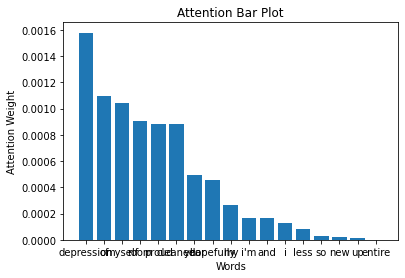

In [17]:
visualize_attention_barplot(word_weights1)

In [18]:
def visualize_attention_heatmap(entry):
    words = list(entry.keys())
    attention_weights = list(entry.values())
    sns.heatmap([attention_weights], xticklabels=words, yticklabels=False, cmap="Blues")
    plt.xlabel("Words")
    plt.ylabel("Attention")
    plt.title("Attention Heatmap")
    plt.show()

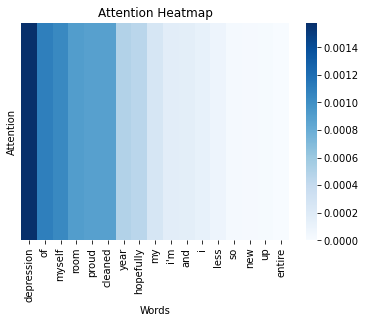

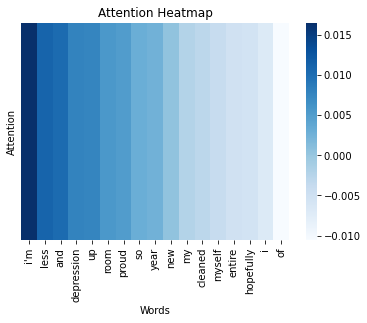

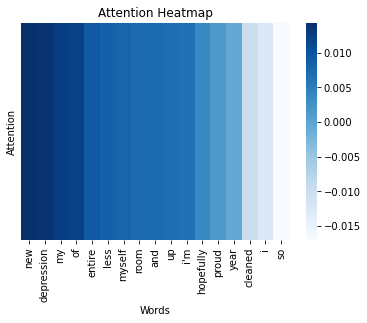

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
visualize_attention_heatmap(word_weights1)
visualize_attention_heatmap(word_weights3)
visualize_attention_heatmap(word_weights2)

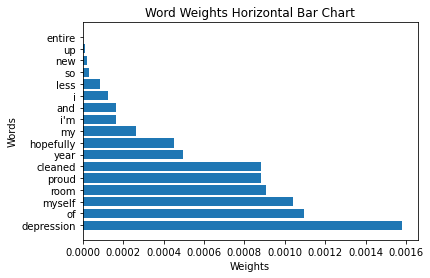

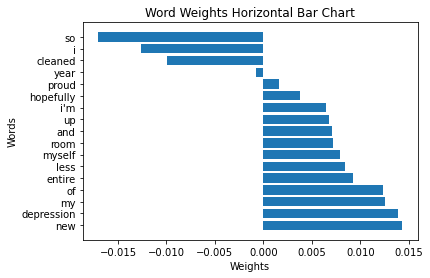

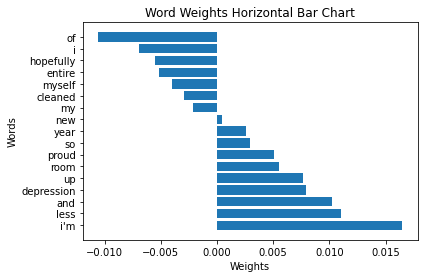

In [20]:
bar_chart_plot(word_weights1)
bar_chart_plot(word_weights2)
bar_chart_plot(word_weights3)

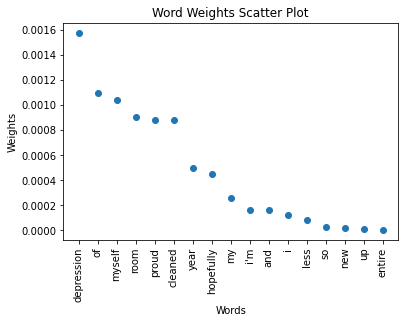

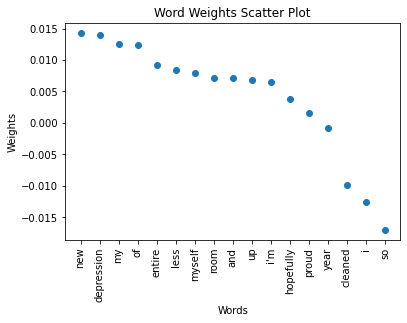

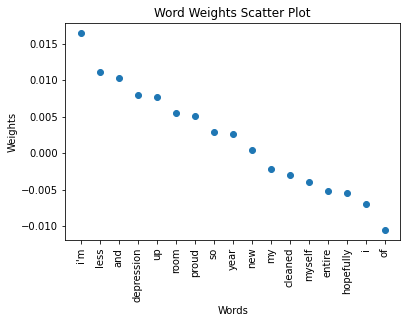

In [21]:
scatter_chart_plot(word_weights1)
scatter_chart_plot(word_weights2)
scatter_chart_plot(word_weights3)

## Check the weight if the same word in different contexts

In [25]:
def Word_Context(df,word):
    filtered_df = df[df['Text'].str.contains(word)]
    distinct_labels = filtered_df['Actual Label'].unique()
    print(distinct_labels[:3])
    return(filtered_df)

In [26]:
display(Word_Context(df_rearranged,"die"))

['severe' 'moderate' 'not depression']


,Text,Actual Label,Predicted Label LSTM,Predicted Label GRU,Predicted Label CNN,Word and Weight LSTM,Word and Weight GRU,Word and Weight CNN,Keywords
7,i truly wish someone would shoot me i hope i die thinking about life and my past like i always am theres no getting away except death,severe,severe,severe,severe,"wish (0.015575863420963287), thinking (0.011929159983992577), about (0.011299856938421726), no (0.010684160515666008), death (0.009891104884445667), like (0.009322820231318474), someone (0.009306780993938446), i (0.008285660296678543), am (0.00678936205804348), die (0.00627454649657011), and (0.005292056128382683), always (0.004983011167496443), life (0.004440824501216412), truly (0.002855079947039485), theres (0.0020596268586814404), i (0.0006185199017636478), hope (5.120864079799503e-05), away (-0.000695405004080385), i (-0.0011007110588252544), i (-0.0028385997284203768), past (-0.003054780187085271), me (-0.003553122980520129), getting (-0.0047912634909152985), would (-0.005936857778578997), except (-0.006886754650622606), shoot (-0.00690979091450572), my (-0.008344129659235477)","i (0.018854334950447083), my (0.018513061106204987), death (0.01820850372314453), hope (0.016911013051867485), past (0.01583259180188179), wish (0.01395745575428009), i (0.012259647250175476), thinking (0.010192366316914558), i (0.009179471991956234), someone (0.008026137948036194), would (0.003273898968473077), die (0.0005194107070565224), i (0.00030090182553976774), truly (-0.00045591610250994563), about (-0.0012176145100966096), am (-0.0028498840983957052), and (-0.0032257884740829468), like (-0.004274082835763693), away (-0.005132988095283508), theres (-0.006206536665558815), getting (-0.006449074950069189), no (-0.006750240921974182), life (-0.014033833518624306), me (-0.01734444685280323), shoot (-0.021825114265084267), except (-0.024721482768654823), always (-0.0367860347032547)","wish (0.009510250762104988), thinking (0.008095267228782177), i (0.007927869446575642), theres (0.00786365196108818), shoot (0.007802069652825594), i (0.007097360212355852), life (0.007010587491095066), no (0.005841179750859737), i (0.005605312064290047), always (0.005476909223943949), am (0.00503100361675024), about (0.0039604902267456055), would (0.0027704460080713034), truly (0.002001530257984996), hope (0.001946193166077137), except (0.0019418003503233194), my (0.0018452004296705127), i (0.0015133365523070097), like (0.0012049874057993293), getting (0.001100347377359867), past (0.0010513653978705406), someone (0.0009061094024218619), death (0.0008778398623690009), and (0.0007575259660370648), me (0.0005853570182807744), die (0.0005791423027403653), away (0.0005234978743828833)","truly wish (0.7070749823585332), die thinking (0.006672325351771721)"
8,whats the purpose of living life gives you pain to make you stronger i dont understand this quote make you stronger for what for more painful experiences that are yet to come i feel like life gives you pain to give you strength that can help you survive all future painful experiences until you die,moderate,moderate,moderate,moderate,"stronger (0.015852149575948715), purpose (0.010673829354345798), you (0.010213872417807579), what (0.008526424877345562), of (0.008189818821847439), you (0.007658788003027439), until (0.00718930596485734), experiences (0.006842271890491247), make (0.006793722044676542), strength (0.006629045121371746), dont (0.005281075835227966), stronger (0.005205328576266766), all (0.005114017985761166), quote (0.004952007904648781), are (0.0047657685354352), future (0.004762273747473955), life (0.004654469899833202), you (0.004206160083413124), you (0.0031782814767211676), you (0.0030298987403512), the (0.0029892190359532833), i (0.002686562482267618), you (0.0021580152679234743), that (0.0020639740396291018), die (0.0018251949222758412), for (0.0008856341009959579), like (0.0005327234975993633), come (0.0003147317620459944), can (0.00023181478900369257), whats (7.677332905586809e-05), mo

In [41]:
specific_word = "depression"
display(Word_Context(df_rearranged,specific_word))

['not depression' 'moderate' 'severe']


,Text,Actual Label,Predicted Label LSTM,Predicted Label GRU,Predicted Label CNN,Word and Weight LSTM,Word and Weight GRU,Word and Weight CNN,Keywords
2,new year less depression hopefully i cleaned up my entire room and i'm so proud of myself,not depression,not depression,not depression,not depression,"i'm (0.016481762751936913), less (0.011053788475692272), and (0.010258651338517666), depression (0.00789401400834322), up (0.007690588012337685), room (0.005526958033442497), proud (0.005069421604275703), so (0.0029499586671590805), year (0.002610687632113695), new (0.0004343146865721792), my (-0.0021507861092686653), cleaned (-0.002963337581604719), myself (-0.003964599221944809), entire (-0.005173871759325266), hopefully (-0.005481524392962456), i (-0.006946386303752661), of (-0.01058532390743494)","new (0.014334767125546932), depression (0.013928133994340897), my (0.012565121054649353), of (0.012323880568146706), entire (0.00921908114105463), less (0.0084296315908432), myself (0.007887253537774086), room (0.007160133682191372), and (0.007123091723769903), up (0.0068006920628249645), i'm (0.006484081968665123), hopefully (0.003750220639631152), proud (0.0015715408371761441), year (-0.0007403867784887552), cleaned (-0.009923315607011318), i (-0.012611916288733482), so (-0.017077889293432236)","depression (0.0015772441402077675), of (0.001096735242754221), myself (0.0010393874254077673), room (0.0009080448653548956), proud (0.000884098990354687), cleaned (0.0008817165507934988), year (0.0004968217108398676), hopefully (0.0004523985262494534), my (0.00026173863443545997), i'm (0.0001668537879595533), and (0.00016433776181656867), i (0.00012614238949026912), less (8.485354919685051e-05), so (3.054567423532717e-05), new (2.051564479188528e-05), up (1.2696364137809724e-05), entire (0.0)","new year (0.7069024374230741), hopefully (0.01591552262484989)"
5,new year's eve i feel like new year's eve i am an outsider i always miss the wild big parties nor am invited to anything and i am tired of spending it with the same family members i feellike everybody always has amazing parties and quality moments and i am an outsider also i dont really see the point to celebrate the passing of time or something that superficial as celibrating a numbet on the calender but perhaps that is my scepticism and depression talking,moderate,moderate,moderate,moderate,"but (0.020559681579470634), outsider (0.016415005549788475), on (0.010359403677284718), an (0.01022428460419178), eve (0.0101853609085083), invited (0.008300993591547012), year's (0.007673909887671471), i (0.007668846286833286), also (0.006991581525653601), i (0.0061394949443638325), amazing (0.006090951152145863), am (0.005929127335548401), point (0.005825407337397337), my (0.005815808195620775), always (0.005133036524057388), am (0.005092053674161434), nor (0.004933882504701614), i (0.004880743101239204), family (0.004826929420232773), has (0.0046447524800896645), tired (0.004617040511220694), wild (0.004377300385385752), parties (0.003472870448604226), or (0.0033318912610411644), depression (0.0032148160971701145), that (0.0031730837654322386), that (0.0028915121220052242), i (0.0027899090200662613), i (0.0024990844540297985), year's (0.002250478370115161), celibrating (0.002080402569845319), really (0.002049969742074609), dont (0.001962233567610383), talking (0.0018958161817863584), parties (0.0018798833480104804), moments (0.0017103218706324697), as (0.0014059540117159486), to (0.0012090080417692661), same (0.0011284237261861563), am (0.0007941726362332702), numbet (0.0007893815054558218), scepticism (0.0006939457380212843), a (0.0004926474648527801), and (0.00029990688199177384), new (0.00019422387413214892), something (-0.0001182787527795881), of (-0.0002469913160894066), anything (-0.0002900062536355108), eve (-0.0007143011316657066), feellike (-0.0009317683288827538), spending (-0.0010084154782816768), passing (-0.0011462375987321138), big (-0.0015140734612941742), am (-0.00153912801761

In [38]:
specific_word = "family"
display(Word_Context(df_rearranged,specific_word))

['moderate' 'not depression']


,Text,Actual Label,Predicted Label LSTM,Predicted Label GRU,Predicted Label CNN,Word and Weight LSTM,Word and Weight GRU,Word and Weight CNN,Keywords
5,new year's eve i feel like new year's eve i am an outsider i always miss the wild big parties nor am invited to anything and i am tired of spending it with the same family members i feellike everybody always has amazing parties and quality moments and i am an outsider also i dont really see the point to celebrate the passing of time or something that superficial as celibrating a numbet on the calender but perhaps that is my scepticism and depression talking,moderate,moderate,moderate,moderate,"but (0.020559681579470634), outsider (0.016415005549788475), on (0.010359403677284718), an (0.01022428460419178), eve (0.0101853609085083), invited (0.008300993591547012), year's (0.007673909887671471), i (0.007668846286833286), also (0.006991581525653601), i (0.0061394949443638325), amazing (0.006090951152145863), am (0.005929127335548401), point (0.005825407337397337), my (0.005815808195620775), always (0.005133036524057388), am (0.005092053674161434), nor (0.004933882504701614), i (0.004880743101239204), family (0.004826929420232773), has (0.0046447524800896645), tired (0.004617040511220694), wild (0.004377300385385752), parties (0.003472870448604226), or (0.0033318912610411644), depression (0.0032148160971701145), that (0.0031730837654322386), that (0.0028915121220052242), i (0.0027899090200662613), i (0.0024990844540297985), year's (0.002250478370115161), celibrating (0.002080402569845319), really (0.002049969742074609), dont (0.001962233567610383), talking (0.0018958161817863584), parties (0.0018798833480104804), moments (0.0017103218706324697), as (0.0014059540117159486), to (0.0012090080417692661), same (0.0011284237261861563), am (0.0007941726362332702), numbet (0.0007893815054558218), scepticism (0.0006939457380212843), a (0.0004926474648527801), and (0.00029990688199177384), new (0.00019422387413214892), something (-0.0001182787527795881), of (-0.0002469913160894066), anything (-0.0002900062536355108), eve (-0.0007143011316657066), feellike (-0.0009317683288827538), spending (-0.0010084154782816768), passing (-0.0011462375987321138), big (-0.0015140734612941742), am (-0.0015391280176118016), celebrate (-0.0017798772314563394), and (-0.0017867475980892777), it (-0.0021186305675655603), to (-0.0024134484119713306), quality (-0.0024625062942504883), superficial (-0.002541198395192623), the (-0.002896335441619158), time (-0.0029395760502666235), everybody (-0.003244582796469331), the (-0.0036138833966106176), of (-0.003645247546955943), new (-0.003791026072576642), i (-0.003945177886635065), is (-0.003990198485553265), an (-0.004016887862235308), members (-0.0046805222518742085), the (-0.005004065111279488), feel (-0.005329702980816364), the (-0.005420680157840252), and (-0.005648243241012096), with (-0.005875341594219208), the (-0.006153916008770466), perhaps (-0.006286940537393093), always (-0.006321178749203682), and (-0.00650825584307313), like (-0.006701400503516197), miss (-0.007844644598662853), i (-0.008576517924666405), outsider (-0.009340057149529457), see (-0.00973447598516941), calender (-0.03545599803328514)","of (0.0522947795689106), members (0.03890952467918396), on (0.01989758014678955), the (0.01853570155799389), celebrate (0.017219681292772293), i (0.016196327283978462), i (0.015037044882774353), of (0.014895914122462273), see (0.014059574343264103), new (0.01397793274372816), eve (0.013504952192306519), miss (0.012448512949049473), to (0.012315175496041775), i (0.01163603737950325), really (0.011466950178146362), am (0.010787824168801308), amazing (0.010090520605444908), the (0.009813657961785793), with (0.00972264539450407), feellike (0.009332641959190369), something (0.009175102226436138), point (0.008869600482285023), the (0.008154335431754589), eve (0.007642352022230625), outsider (0.00721927871927619), i (0.007085195742547512), big (0.006737792864441872), ce

In [43]:
specific_word = "feeling"
display(Word_Context(df_rearranged,specific_word))

['moderate' 'not depression']


,Text,Actual Label,Predicted Label LSTM,Predicted Label GRU,Predicted Label CNN,Word and Weight LSTM,Word and Weight GRU,Word and Weight CNN,Keywords
13,i dont know what to do i have been in a really bad state of mind for the entire year the person who is most there for me is my mom i have thought of self harm but i cant because i feel that i will do something that will harm my family more than me ive read on this sub that parents that have to burry or see a child die is the worst possible feeling i cant bring myself to do it but tonight and also a few other times i heard my mom talking about how i am a burden on her and how im stressing and how me and my problems are effecting her daily life and her mental health now i feel like absolute shit i have no idea what to do well thanks for trying to read my dumb story and happy new year to all hope it starts off better than mine,moderate,moderate,moderate,moderate,"feeling (0.0219294261187315), bad (0.01493848767131567), the (0.010159304365515709), really (0.009447340853512287), know (0.00938564445823431), about (0.008685735985636711), who (0.008261914364993572), have (0.007827912457287312), what (0.007676852401345968), on (0.006935460958629847), heard (0.006855194456875324), family (0.006849410943686962), for (0.006775091867893934), a (0.006698453798890114), a (0.006299146916717291), feel (0.00574876694008708), the (0.004921276122331619), my (0.004799516871571541), that (0.004753962159156799), of (0.004717191215604544), will (0.004655411932617426), the (0.004635839257389307), other (0.004593029152601957), myself (0.004277442116290331), also (0.0041765812784433365), year (0.003928239922970533), self (0.0037311543710529804), i (0.0036485593300312757), i (0.003242793958634138), this (0.003109606448560953), cant (0.002833814127370715), dont (0.0028231379110366106), is (0.002769523998722434), i (0.0026201214641332626), it (0.002415068680420518), do (0.002368657849729061), than (0.002231091260910034), more (0.0021673431620001793), to (0.002111073350533843), person (0.002001633169129491), that (0.0019988412968814373), times (0.0019127464620396495), but (0.0018942818278446794), child (0.0018708196002990007), me (0.0018452962394803762), is (0.0017807841068133712), state (0.001725725014694035), a (0.001340918825007975), i (0.0011883745901286602), die (0.0009527048678137362), burry (0.0007372242398560047), to (0.0006730558234266937), talking (0.0004835322906728834), of (0.00048298534238711), or (0.00021633482538163662), i (0.0001219455516547896), and (-1.3380250720729236e-06), mom (-9.522755863144994e-05), that (-0.0006978362216614187), most (-0.001049189129844308), parents (-0.0011929397005587816), i (-0.001256674062460661), me (-0.0012730928137898445), tonight (-0.0014249347150325775), i (-0.0016117473132908344), will (-0.002037083962932229), entire (-0.002136753872036934), been (-0.002298274077475071), sub (-0.002475964603945613), i (-0.0025434282142668962), how (-0.0025440300814807415), something (-0.0026444862596690655), is (-0.002711064647883177), see (-0.0029545833822339773), that (-0.0030103407334536314), have (-0.0034093675203621387), for (-0.0035590261686593294), harm (-0.003885328769683838), my (-0.004037191160023212), in (-0.0042539616115391254), cant (-0.004392158705741167), bring (-0.00441286526620388), do (-0.0045113638043403625), few (-0.004566815681755543), harm (-0.0047531467862427235), worst (-0.004893122240900993), have (-0.005435681901872158), to (-0.00592109514400363), i (-0.005987502168864012), read (-0.006036005448549986), thought (-0.006042622495442629), because (-0.006390625145286322), there (-0.006530412472784519), do (-0.006543790455907583), but (-0.007116565480828285), ive (-0.007702595088630915), my (-0.007770434953272343), mom (-0.008661319501698017), mind (-0.009377313777804375), possible (-0.03643813356757164)","my (0.051957789808511734), harm (0.03716946020722389), talking (0.024057313799858093), in (0.01880742609500885), the (0.01848536916077137), sub (0.01

In [29]:
specific_word = "die"
display(Word_Context(df_rearranged,specific_word))

['severe' 'moderate' 'not depression']


,Text,Actual Label,Predicted Label LSTM,Predicted Label GRU,Predicted Label CNN,Word and Weight LSTM,Word and Weight GRU,Word and Weight CNN,Keywords
7,i truly wish someone would shoot me i hope i die thinking about life and my past like i always am theres no getting away except death,severe,severe,severe,severe,"wish (0.015575863420963287), thinking (0.011929159983992577), about (0.011299856938421726), no (0.010684160515666008), death (0.009891104884445667), like (0.009322820231318474), someone (0.009306780993938446), i (0.008285660296678543), am (0.00678936205804348), die (0.00627454649657011), and (0.005292056128382683), always (0.004983011167496443), life (0.004440824501216412), truly (0.002855079947039485), theres (0.0020596268586814404), i (0.0006185199017636478), hope (5.120864079799503e-05), away (-0.000695405004080385), i (-0.0011007110588252544), i (-0.0028385997284203768), past (-0.003054780187085271), me (-0.003553122980520129), getting (-0.0047912634909152985), would (-0.005936857778578997), except (-0.006886754650622606), shoot (-0.00690979091450572), my (-0.008344129659235477)","i (0.018854334950447083), my (0.018513061106204987), death (0.01820850372314453), hope (0.016911013051867485), past (0.01583259180188179), wish (0.01395745575428009), i (0.012259647250175476), thinking (0.010192366316914558), i (0.009179471991956234), someone (0.008026137948036194), would (0.003273898968473077), die (0.0005194107070565224), i (0.00030090182553976774), truly (-0.00045591610250994563), about (-0.0012176145100966096), am (-0.0028498840983957052), and (-0.0032257884740829468), like (-0.004274082835763693), away (-0.005132988095283508), theres (-0.006206536665558815), getting (-0.006449074950069189), no (-0.006750240921974182), life (-0.014033833518624306), me (-0.01734444685280323), shoot (-0.021825114265084267), except (-0.024721482768654823), always (-0.0367860347032547)","wish (0.009510250762104988), thinking (0.008095267228782177), i (0.007927869446575642), theres (0.00786365196108818), shoot (0.007802069652825594), i (0.007097360212355852), life (0.007010587491095066), no (0.005841179750859737), i (0.005605312064290047), always (0.005476909223943949), am (0.00503100361675024), about (0.0039604902267456055), would (0.0027704460080713034), truly (0.002001530257984996), hope (0.001946193166077137), except (0.0019418003503233194), my (0.0018452004296705127), i (0.0015133365523070097), like (0.0012049874057993293), getting (0.001100347377359867), past (0.0010513653978705406), someone (0.0009061094024218619), death (0.0008778398623690009), and (0.0007575259660370648), me (0.0005853570182807744), die (0.0005791423027403653), away (0.0005234978743828833)","truly wish (0.7070749823585332), die thinking (0.006672325351771721)"
8,whats the purpose of living life gives you pain to make you stronger i dont understand this quote make you stronger for what for more painful experiences that are yet to come i feel like life gives you pain to give you strength that can help you survive all future painful experiences until you die,moderate,moderate,moderate,moderate,"stronger (0.015852149575948715), purpose (0.010673829354345798), you (0.010213872417807579), what (0.008526424877345562), of (0.008189818821847439), you (0.007658788003027439), until (0.00718930596485734), experiences (0.006842271890491247), make (0.006793722044676542), strength (0.006629045121371746), dont (0.005281075835227966), stronger (0.005205328576266766), all (0.005114017985761166), quote (0.004952007904648781), are (0.0047657685354352), future (0.004762273747473955), life (0.004654469899833202), you (0.004206160083413124), you (0.0031782814767211676), you (0.0030298987403512), the (0.0029892190359532833), i (0.002686562482267618), you (0.0021580152679234743), that (0.0020639740396291018), die (0.0018251949222758412), for (0.0008856341009959579), like (0.0005327234975993633), come (0.0003147317620459944), can (0.00023181478900369257), whats (7.677332905586809e-05), mo